In [1]:
import argparse
import json
import os
import pandas as pd
from datetime import datetime, timedelta
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import pytz
import numpy as np
from scipy.signal import savgol_filter
import random


In [2]:
dirpath = os.getcwd()
data_path = os.path.join(dirpath, 'data')

In [3]:
def get_raw_candles(filename):
    names = ["date", "open", "high", "low", "close", "volume"]
    df = pd.read_csv(os.path.join(data_path,filename), names=names, skiprows=1)
    df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y %H:%M:%S.%f')
    df['date'] = df['date'].dt.tz_localize('GMT')
    df['date'] = df['date'].dt.tz_convert('America/New_York')
    df['dow'] = df['date'].apply(lambda r: r.weekday())
    df['price'] = df.apply(lambda r: (r.close+r.open+r.low+r.high)/4, axis = 1)

    return df

# dow

load some data

## date enum:
```
0 Monday
1 Tuesday
.
6 Sunday
```

In [4]:
# df = get_raw_candles('DOLLAR.IDXUSD_Candlestick_1_Hour_BID_01.12.2017-11.12.2021.csv')
df = get_raw_candles('EURUSD_Candlestick_1_Hour_BID_01.01.2016-29.05.2021.csv')

In [5]:
df.head()

,date,open,high,low,close,volume,dow,price
0,2015-12-31 19:00:00-05:00,1.08564,1.08564,1.08564,1.08564,0.0,3,1.08564
1,2015-12-31 20:00:00-05:00,1.08564,1.08564,1.08564,1.08564,0.0,3,1.08564
2,2015-12-31 21:00:00-05:00,1.08564,1.08564,1.08564,1.08564,0.0,3,1.08564
3,2015-12-31 22:00:00-05:00,1.08564,1.08564,1.08564,1.08564,0.0,3,1.08564
4,2015-12-31 23:00:00-05:00,1.08564,1.08564,1.08564,1.08564,0.0,3,1.08564


In [6]:
import datetime

true_day = datetime.time(0,0)
last_candle = datetime.time(23,0)

In [7]:
mondays = df[(df.dow == 0) & (df['date'].apply(lambda r: r.time()) == true_day)]

In [8]:
fridays = df[(df.dow == 4) & (df['date'].apply(lambda r: r.time()) == last_candle)]

In [9]:
week_candles = []

m = mondays.index
f = fridays.index


j = 0
for i in range(len(m)):
    u = m[i]
    while True:
        w = f[j]
        if w < u:
            j = j + 1
        else:
            break
    week_candles.append(df[u:w])


In [10]:
len(week_candles)

282

In [11]:
def is_high_on_dow(dow, week_candles):
    high_dow = w.dow[w.idxmax()['high']]
    return high_dow == dow

def is_low_on_dow(dow, week_candles):
    low_dow = w.dow[w.idxmin()['low']]
    return low_dow == dow

In [17]:
bucket_high = {0:[], 1:[],2:[],3:[],4:[]}
bucket_low = {0:[], 1:[],2:[],3:[],4:[]}
for i in range(len(week_candles)):
    w = week_candles[i]
    high_dow = w.dow[w.idxmax()['high']]
    bucket_high[high_dow] +=[i]
    
    low_dow = w.dow[w.idxmin()['low']]
    bucket_low[low_dow] +=[i]
    

In [44]:
counts = [len(x) for x in bucket_high.values()]
fig = px.bar(x=list(bucket_high.keys()), y=counts, labels={'x':'day of week', 'y':'count'})
fig.show()

In [45]:
counts = [len(x) for x in bucket_low.values()]
fig = px.bar(x=list(bucket_low.keys()), y=counts, labels={'x':'day of week', 'y':'count'})
fig.show()

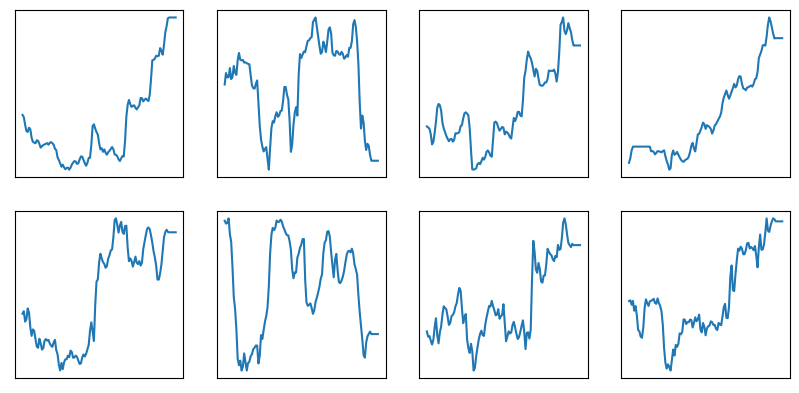

In [57]:
import matplotlib.pyplot as plt

cid = 1
plt.figure(figsize=(10, 10))

for p in range(1,9):
    plt.subplot(440+p)
    i = random.randint(0, len(bucket_low[1]))
    idx = bucket_low[1][i]
    plt.plot(week_candles[idx].price)
    ax = plt.gca()
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
plt.show()